In [1]:
## Python package imports 
import numpy as np
import matplotlib
import scipy.integrate as sint
import matplotlib.pyplot as plt

## respic imports
import solvers
import particles
import diagnostics
import constants

## constants 
q = constants.cgs_constants['q']
c = constants.cgs_constants['c']
m_e = constants.cgs_constants['m_e']
m_p = constants.cgs_constants['m_p']
pi = np.pi


In [2]:
## Particle definitions and simulation setup
sigma_x = 0.05
Q = constants.charge_mks_to_cgs(5.0e-12)
n_particles = 10000
ds = 0.1
s = 0


## This is where we initialize a gaussian distribuiton
distribution = particles.distribution(N = n_particles)
distribution.construct_uniform_guassian_2D(sigma_x = sigma_x, sigma_y = sigma_x,
                                          sigma_xp = sigma_x, sigma_yp = sigma_x)

## Particle distributions
# The first beam is the one that uses the drift map
my_gaussian_beam = particles.particles_2D_tent(distribution, bunch_charge = Q, species_mass = m_p)

# This is for the matrix map
my_gaussian_beam_matrix = distribution

## Diagnostics 
respic_diag = diagnostics.bunch_statistics()
matrix_diag = diagnostics.bunch_statistics(divergence_coordinates = True)


In [3]:
## Load the maps
maps = solvers.symplectic_maps()

## Define steppers 
def step(particles, ds = ds):
    maps.drift(particles, ds = ds)

def step_matrix(particles, ds = ds):
    particles.x = particles.x + ds * particles.xp
    particles.y = particles.y + ds * particles.yp


In [4]:
## Here we run the simulation, 100 steps using the stepper functions defined in the previous block

respic_diag.update(s, my_gaussian_beam)
matrix_diag.update(s, my_gaussian_beam_matrix)

k = 0

while k < 100:

    step(my_gaussian_beam)
    step_matrix(my_gaussian_beam_matrix)
    
    s = s + ds
    
    respic_diag.update(s, my_gaussian_beam)
    matrix_diag.update(s, my_gaussian_beam_matrix)
        
    k = k + 1

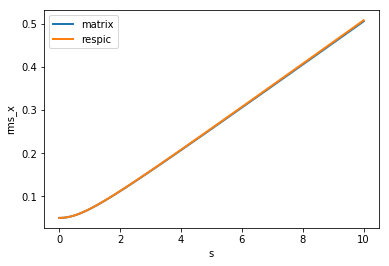

In [5]:
## Plotting 

x_key = 's'
y_key = 'rms_x'

plt.figure()
matrix_diag.plot(x_key, y_key)
respic_diag.plot(x_key, y_key)
plt.xlabel(x_key)
plt.ylabel(y_key)
plt.legend(['matrix', 'respic'])
plt.show()